<a href="https://colab.research.google.com/github/Ragulan-K/FYP/blob/main/FYP_MY_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importing Libraries

In [1]:
# Importing essential libraries for data analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ensuring that plots are displayed inline within Jupyter Notebooks
%matplotlib inline

# Suppressing any warnings for cleaner output
import warnings
warnings.simplefilter("ignore")


In [2]:
# Configuring pandas to display all columns and rows, with a precision of 3 decimal places
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.precision = 3


2. Importing Power Generation & Weather Sensor Data

In [5]:
generation_data = pd.read_csv('/content/Plant_2_Generation_Data.csv')

In [4]:
weather_data = pd.read_csv('/content/Plant_2_Weather_Sensor_Data.csv')

In [6]:
# Apply custom styles to a random sample of 5 rows in the DataFrame
styled_sample = generation_data.sample(5).style.applymap(
    lambda _: 'background-color: OliveDrab; color: white; border: 1px solid black;'
)
styled_sample


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
9190,2020-05-19 08:30:00,4136001,oZZkBaNadn6DNKz,507.260000,497.480000,698.733333,1708109490.733333
49296,2020-06-09 06:45:00,4136001,V94E5Ben1TlhnDV,136.013333,132.626667,47.666667,1412251664.666667
20573,2020-05-25 23:30:00,4136001,oZZkBaNadn6DNKz,0.000000,0.000000,9071.000000,1708156497.000000
620,2020-05-15 07:00:00,4136001,IQ2d7wF4YD8zU1Q,310.386667,304.960000,98.866667,19941624.866667
48762,2020-06-09 00:45:00,4136001,LlT2YUhhzqhg5Sw,0.000000,0.000000,2841.000000,282745621.000000


In [7]:
# Display a styled sample of 5 rows from the weather data
weather_data.sample(5).style.set_table_styles(
    [{
        'selector': '',
        'props': [
            ('background-color', 'pink'),
            ('color', 'black'),
            ('border-color', 'darkgray')
        ]
    }]
)


,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
3088,2020-06-16 05:15:00,4136001,iq8k7ZNt4Mwm3w0,24.045504,23.184933,0.000000
495,2020-05-20 04:15:00,4136001,iq8k7ZNt4Mwm3w0,24.191343,23.287201,0.000033
27,2020-05-15 06:45:00,4136001,iq8k7ZNt4Mwm3w0,25.048245,25.746662,0.103496
1300,2020-05-28 13:30:00,4136001,iq8k7ZNt4Mwm3w0,35.421690,57.171375,0.873167
1873,2020-06-03 13:15:00,4136001,iq8k7ZNt4Mwm3w0,27.092229,30.629103,0.387106


3. Adjust datetime format

In [8]:
# Convert 'DATE_TIME' column to datetime format in generation_data
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Convert 'DATE_TIME' column to datetime format in weather_data
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


4. Merging generation data and weather sensor data

In [10]:
# Merge generation_data and weather_data excluding 'PLANT_ID' columns
df_solar = pd.merge(generation_data.drop(columns=['PLANT_ID']), weather_data.drop(columns=['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')

# Display a styled sample of 5 rows from df_solar with a cool color gradient
df_solar.sample(5).style.background_gradient(cmap='cool')


,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
46853,2020-06-08 03:00:00,Quc1TzYxW2pYoWX,0.000000,0.000000,2598.000000,329611621.000000,24.461682,23.499139,0.000000
62082,2020-06-15 08:00:00,oZZkBaNadn6DNKz,508.293333,498.260000,391.266667,1708275369.266667,27.251525,34.611373,0.384459
35861,2020-06-02 21:45:00,vOuJvMaM2sgwLmb,0.000000,0.000000,3796.000000,2341270.000000,25.658333,24.306131,0.000000
42607,2020-06-06 02:45:00,Quc1TzYxW2pYoWX,0.000000,0.000000,3779.000000,329605610.000000,23.648073,21.750160,0.000000
12283,2020-05-21 04:30:00,Et9kgGMDl729KT4,0.000000,0.000000,0.000000,1728891.000000,23.666125,22.181261,0.000000


5. Adding separate time and date columns

In [11]:
# Separating time and date columns
df_solar["DATE"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.date
df_solar["TIME"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.time
df_solar['DAY'] = pd.to_datetime(df_solar['DATE_TIME']).dt.day
df_solar['MONTH'] = pd.to_datetime(df_solar['DATE_TIME']).dt.month
df_solar['WEEK'] = pd.to_datetime(df_solar['DATE_TIME']).dt.isocalendar().week

# Adding hours and minutes for ML models
df_solar['HOURS'] = pd.to_datetime(df_solar['TIME'], format='%H:%M:%S').dt.hour
df_solar['MINUTES'] = pd.to_datetime(df_solar['TIME'], format='%H:%M:%S').dt.minute
df_solar['TOTAL_MINUTES_PASS'] = df_solar['MINUTES'] + df_solar['HOURS']*60

# Adding date as a string column
df_solar["DATE_STRING"] = df_solar["DATE"].astype(str)
df_solar["HOURS"] = df_solar["HOURS"].astype(str)
df_solar["TIME"] = df_solar["TIME"].astype(str)

df_solar.head(5)


,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL_MINUTES_PASS,DATE_STRING
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.000,2.429e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.000,1.215e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
2,2020-05-15,9kRcWv60rDACzjR,0.0,0.0,3075.333,2.248e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
3,2020-05-15,Et9kgGMDl729KT4,0.0,0.0,269.933,1.704e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
4,2020-05-15,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000,1.994e+07,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15


In [12]:
# Displaying information about the df_solar DataFrame
df_solar_info = df_solar.info()
df_solar_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   SOURCE_KEY           67698 non-null  object        
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   AMBIENT_TEMPERATURE  67698 non-null  float64       
 7   MODULE_TEMPERATURE   67698 non-null  float64       
 8   IRRADIATION          67698 non-null  float64       
 9   DATE                 67698 non-null  object        
 10  TIME                 67698 non-null  object        
 11  DAY                  67698 non-null  int32         
 12  MONTH                67698 non-null  int32         
 13  WEEK                 67698 non-

In [13]:
df_solar.isnull().sum()

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
TIME                   0
DAY                    0
MONTH                  0
WEEK                   0
HOURS                  0
MINUTES                0
TOTAL_MINUTES_PASS     0
DATE_STRING            0
dtype: int64

There is no Missing Values in the dataset

In [14]:
# Displaying descriptive statistics with a rainbow-colored background gradient
df_solar_desc = df_solar.describe().style.background_gradient(cmap='rainbow')
df_solar_desc


,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,MONTH,WEEK,MINUTES,TOTAL_MINUTES_PASS
count,67698,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000
mean,2020-06-01 10:44:33.650625024,246.701961,241.277825,3294.890295,658944788.423766,27.986756,32.607233,0.229204,15.530680,5.529705,22.563296,22.517061,714.329522
min,2020-05-15 00:00:00,0.000000,0.000000,0.000000,0.000000,20.942385,20.265123,0.000000,1.000000,5.000000,20.000000,0.000000,0.000000
25%,2020-05-23 21:00:00,0.000000,0.000000,272.750000,19964944.866667,24.570349,23.685627,0.000000,9.000000,5.000000,21.000000,15.000000,360.000000
50%,2020-06-01 23:00:00,0.000000,0.000000,2911.000000,282627587.000000,26.910352,27.433723,0.018554,16.000000,6.000000,23.000000,30.000000,720.000000
75%,2020-06-09 23:30:00,446.591667,438.215000,5534.000000,1348495113.000000,30.912601,40.019036,0.431027,22.000000,6.000000,24.000000,45.000000,1080.000000
max,2020-06-17 23:45:00,1420.933333,1385.420000,9873.000000,2247916295.000000,39.181638,66.635953,1.098766,31.000000,6.000000,25.000000,45.000000,1425.000000
std,nan,370.569597,362.112118,2919.448386,729667771.073241,4.021294,11.226446,0.309365,8.527546,0.499120,1.474730,16.764084,415.672274


6. Converting 'SOURCE_KEY' from categorical form to numerical form

In [15]:
# Importing the LabelEncoder class from the sklearn.preprocessing module
from sklearn.preprocessing import LabelEncoder

# Creating an instance of the LabelEncoder class
encoder = LabelEncoder()

# Applying label encoding to the 'SOURCE_KEY' column and storing the result in a new column 'SOURCE_KEY_NUMBER'
df_solar['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_solar['SOURCE_KEY'])

# Displaying the first few rows of the DataFrame
df_solar_head = df_solar.head()
df_solar_head


,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL_MINUTES_PASS,DATE_STRING,SOURCE_KEY_NUMBER
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.000,2.429e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,0
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.000,1.215e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,1
2,2020-05-15,9kRcWv60rDACzjR,0.0,0.0,3075.333,2.248e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,2
3,2020-05-15,Et9kgGMDl729KT4,0.0,0.0,269.933,1.704e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,3
4,2020-05-15,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000,1.994e+07,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,4


##DATA VISUALIZATION

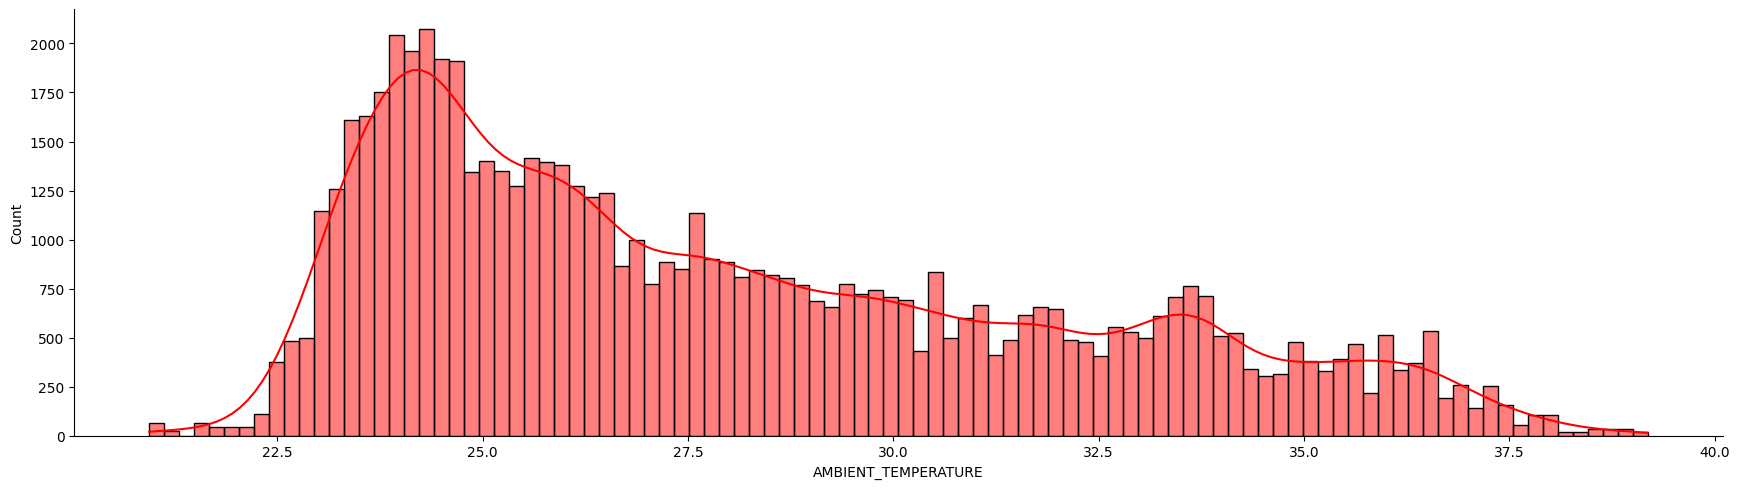

In [16]:
# Importing seaborn library
import seaborn as sns

# Creating a distribution plot for the 'AMBIENT_TEMPERATURE' column
sns.displot(data=df_solar, x="AMBIENT_TEMPERATURE", kde=True, bins=100, color="red", alpha=0.5, height=5, aspect=3.5)


In [17]:
df_solar['DATE'].nunique()

34

The data of solar power generation is of 34 days

## Faults & Abnormalities detection in solar power plant generation

7. Multiple Plotting of DC_POWER generation on per day basis.

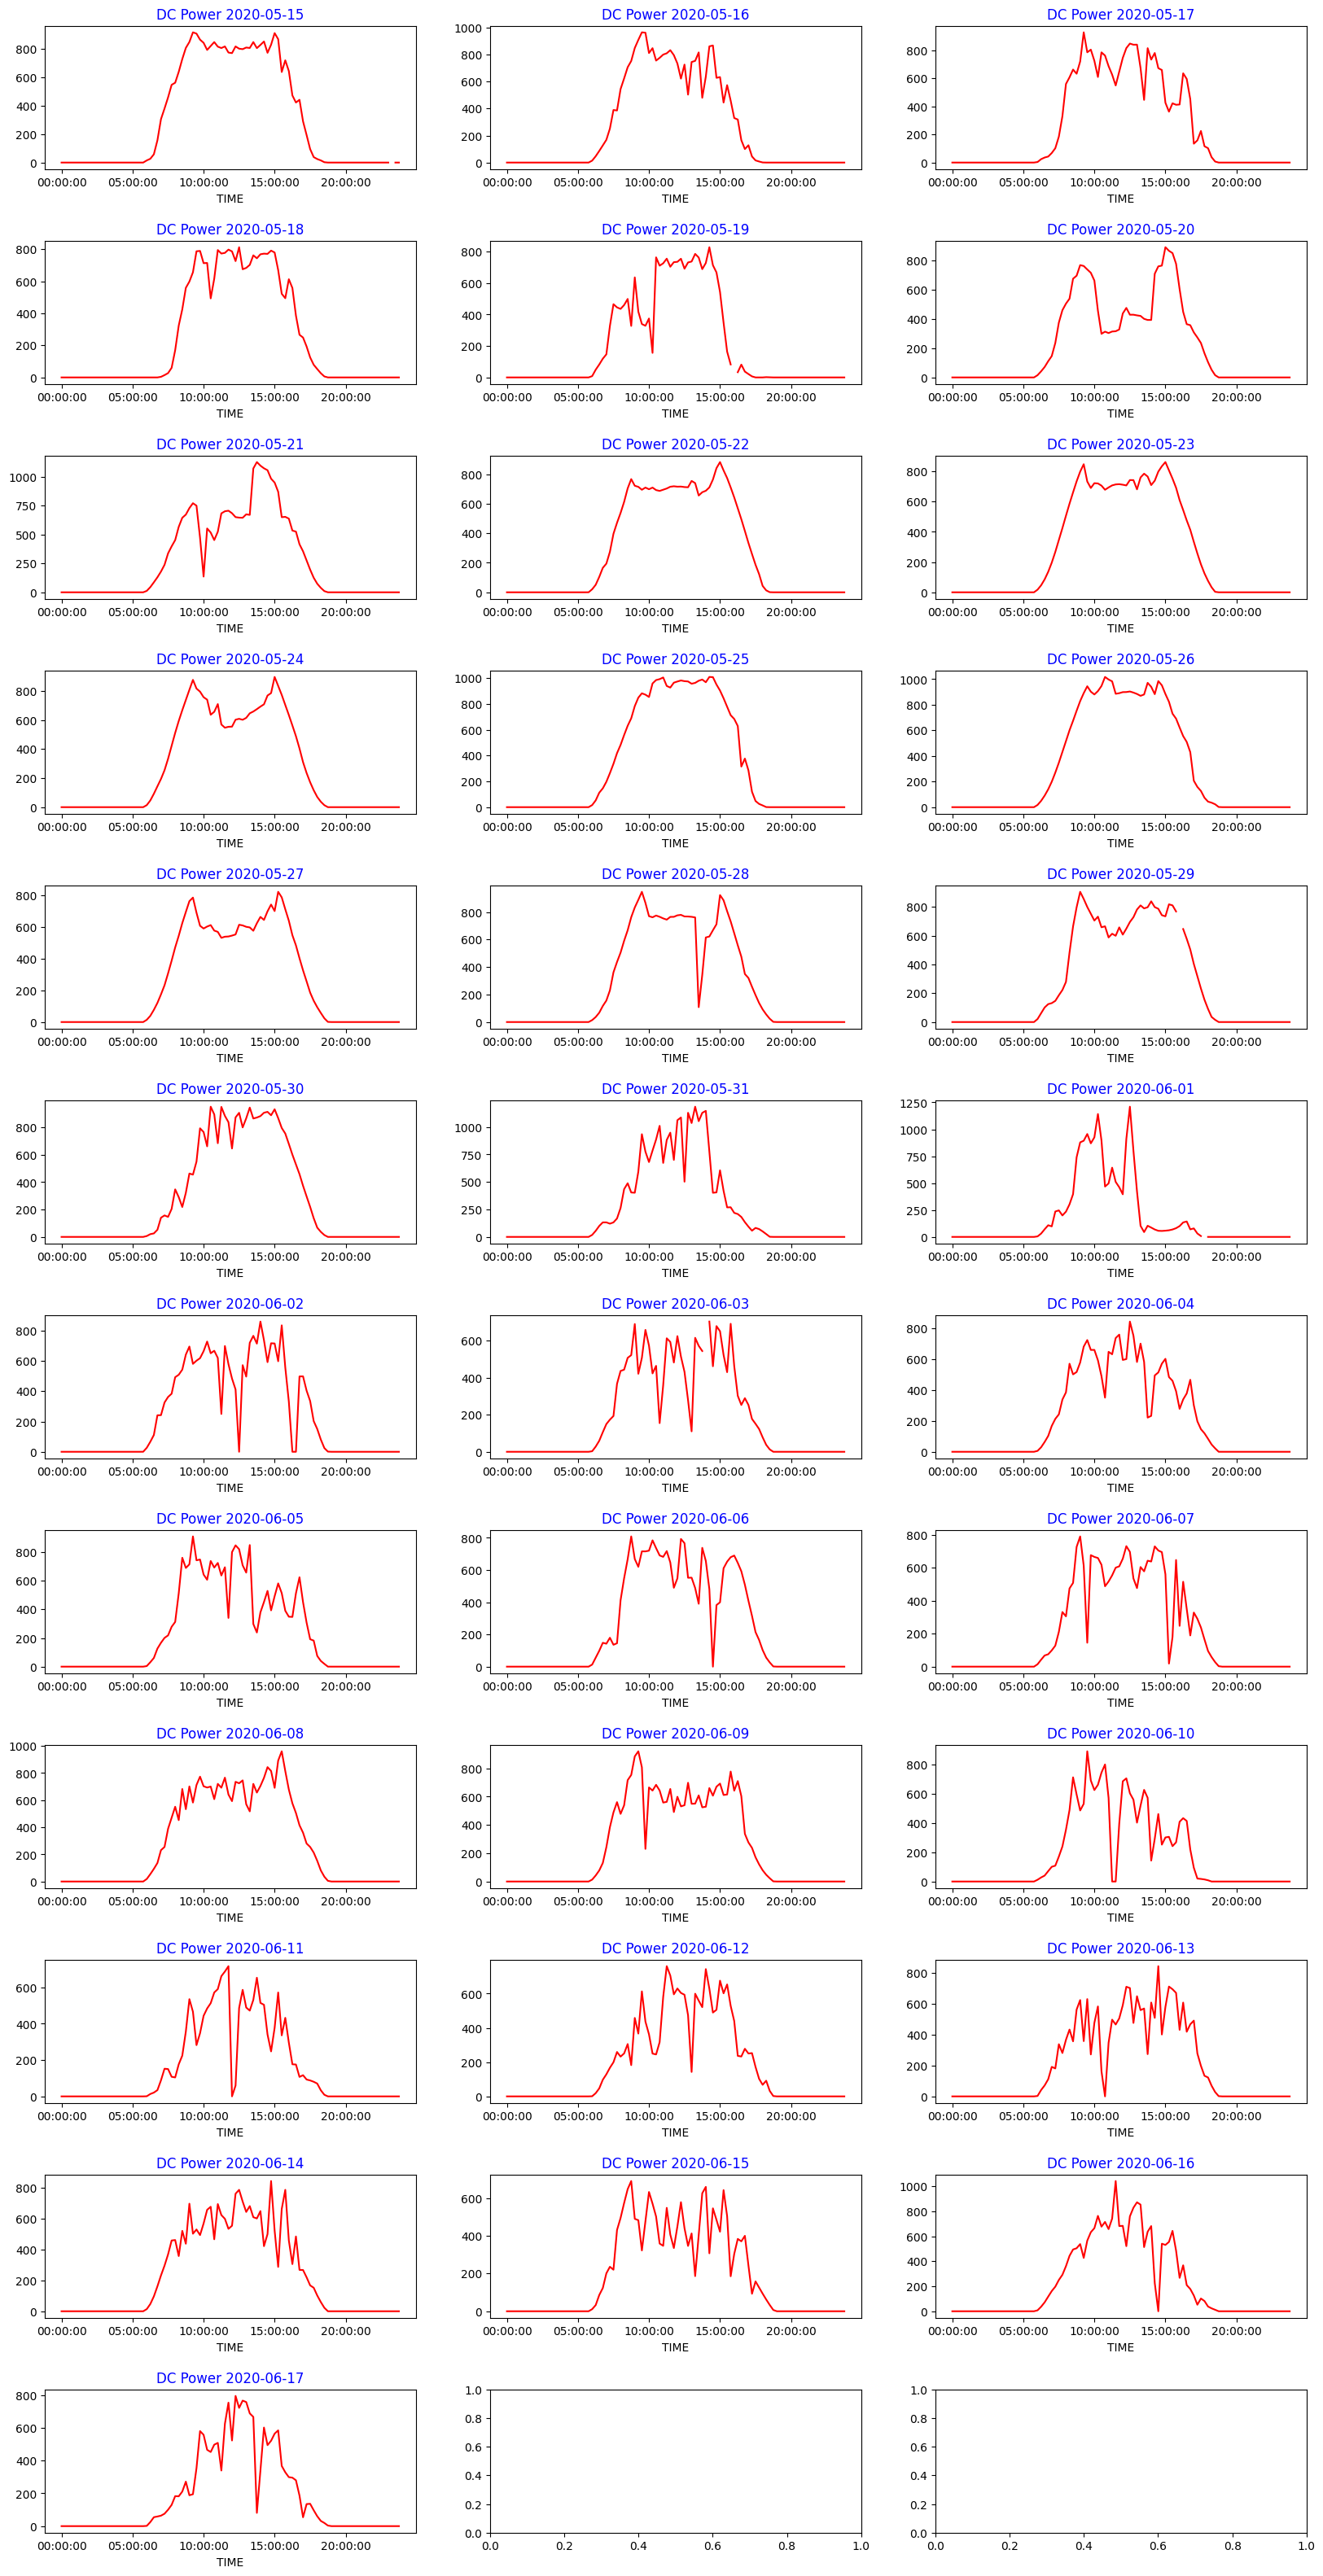

In [25]:
solar_dc = df_solar.pivot_table(values='DC_POWER', index='TIME', columns='DATE')
def daywise_plot(data=None, row=None, col=None, title='DC Power'):
    cols = data.columns
    num_cols = len(cols)
    num_rows = (num_cols + col - 1) // col  # Calculate the number of rows needed
    fig, axes = plt.subplots(num_rows, col, figsize=(20, 40))

    fig.subplots_adjust(wspace=0.2, hspace=0.5)
    for i, col_name in enumerate(cols):
        row_index = i // col
        col_index = i % col
        ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]  # Adjusting subplot indexing for multiple rows
        data[col_name].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, col_name), color='blue')

daywise_plot(data=solar_dc, row=12, col=3)








##Abnormalities in DC_POWER Generation

Less Fluctuation in DC_POWER generation is observed in these days.

1. 2020-05-15
2. 2020-05-18
3. 2020-05-22
4. 2020-05-23
5. 2020-05-24
6. 2020-05-25
7. 2020-05-26

High Fluctuation in DC_POWER generation is observed in these days.

1. 2020-05-19
2. 2020-05-28
3. 2020-05-29
4. 2020-06-02
5. 2020-06-03
6. 2020-06-04
7. 2020-06-13
8. 2020-06-14
9. 2020-06-17

Very High Fluctuation & Reduction in DC_POWER generation is observed in these days.

1. 2020-06-03
2. 2020-06-11
3. 2020-06-12
4. 2020-06-15

Note: Reason for very high Fluctuation & Reduction in DC_POWER generation is due to fault in the system or may be fluctuation in weather or due to clouds etc. which need to be analyse further

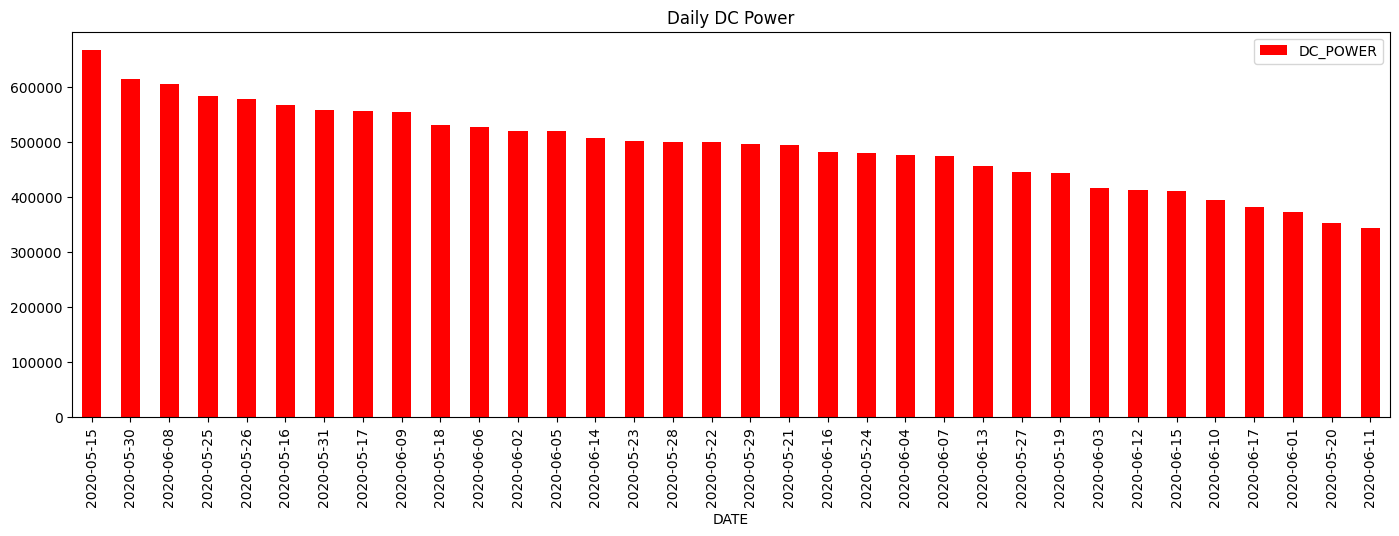

In [26]:
# Grouping by date and aggregating the sum of DC_POWER for each date
daily_dc = df_solar.groupby('DATE')['DC_POWER'].agg('sum')

# Sorting the daily_dc Series in descending order of DC_POWER
daily_dc_sorted = daily_dc.sort_values(ascending=False)

# Plotting the sorted daily DC power
ax = daily_dc_sorted.plot.bar(figsize=(17,5), legend=True, color='red')
plt.title('Daily DC Power')
plt.show()


Form the per day DC_POWER generation graph we can find the average power generation per day.

Highest average DC_POWER Generation is on: 2020-05-15

Lowest average DC_POWER Generation is on : 2020-06-11

8. Multiple Plotting of IRRADIATION generation on per day basis.

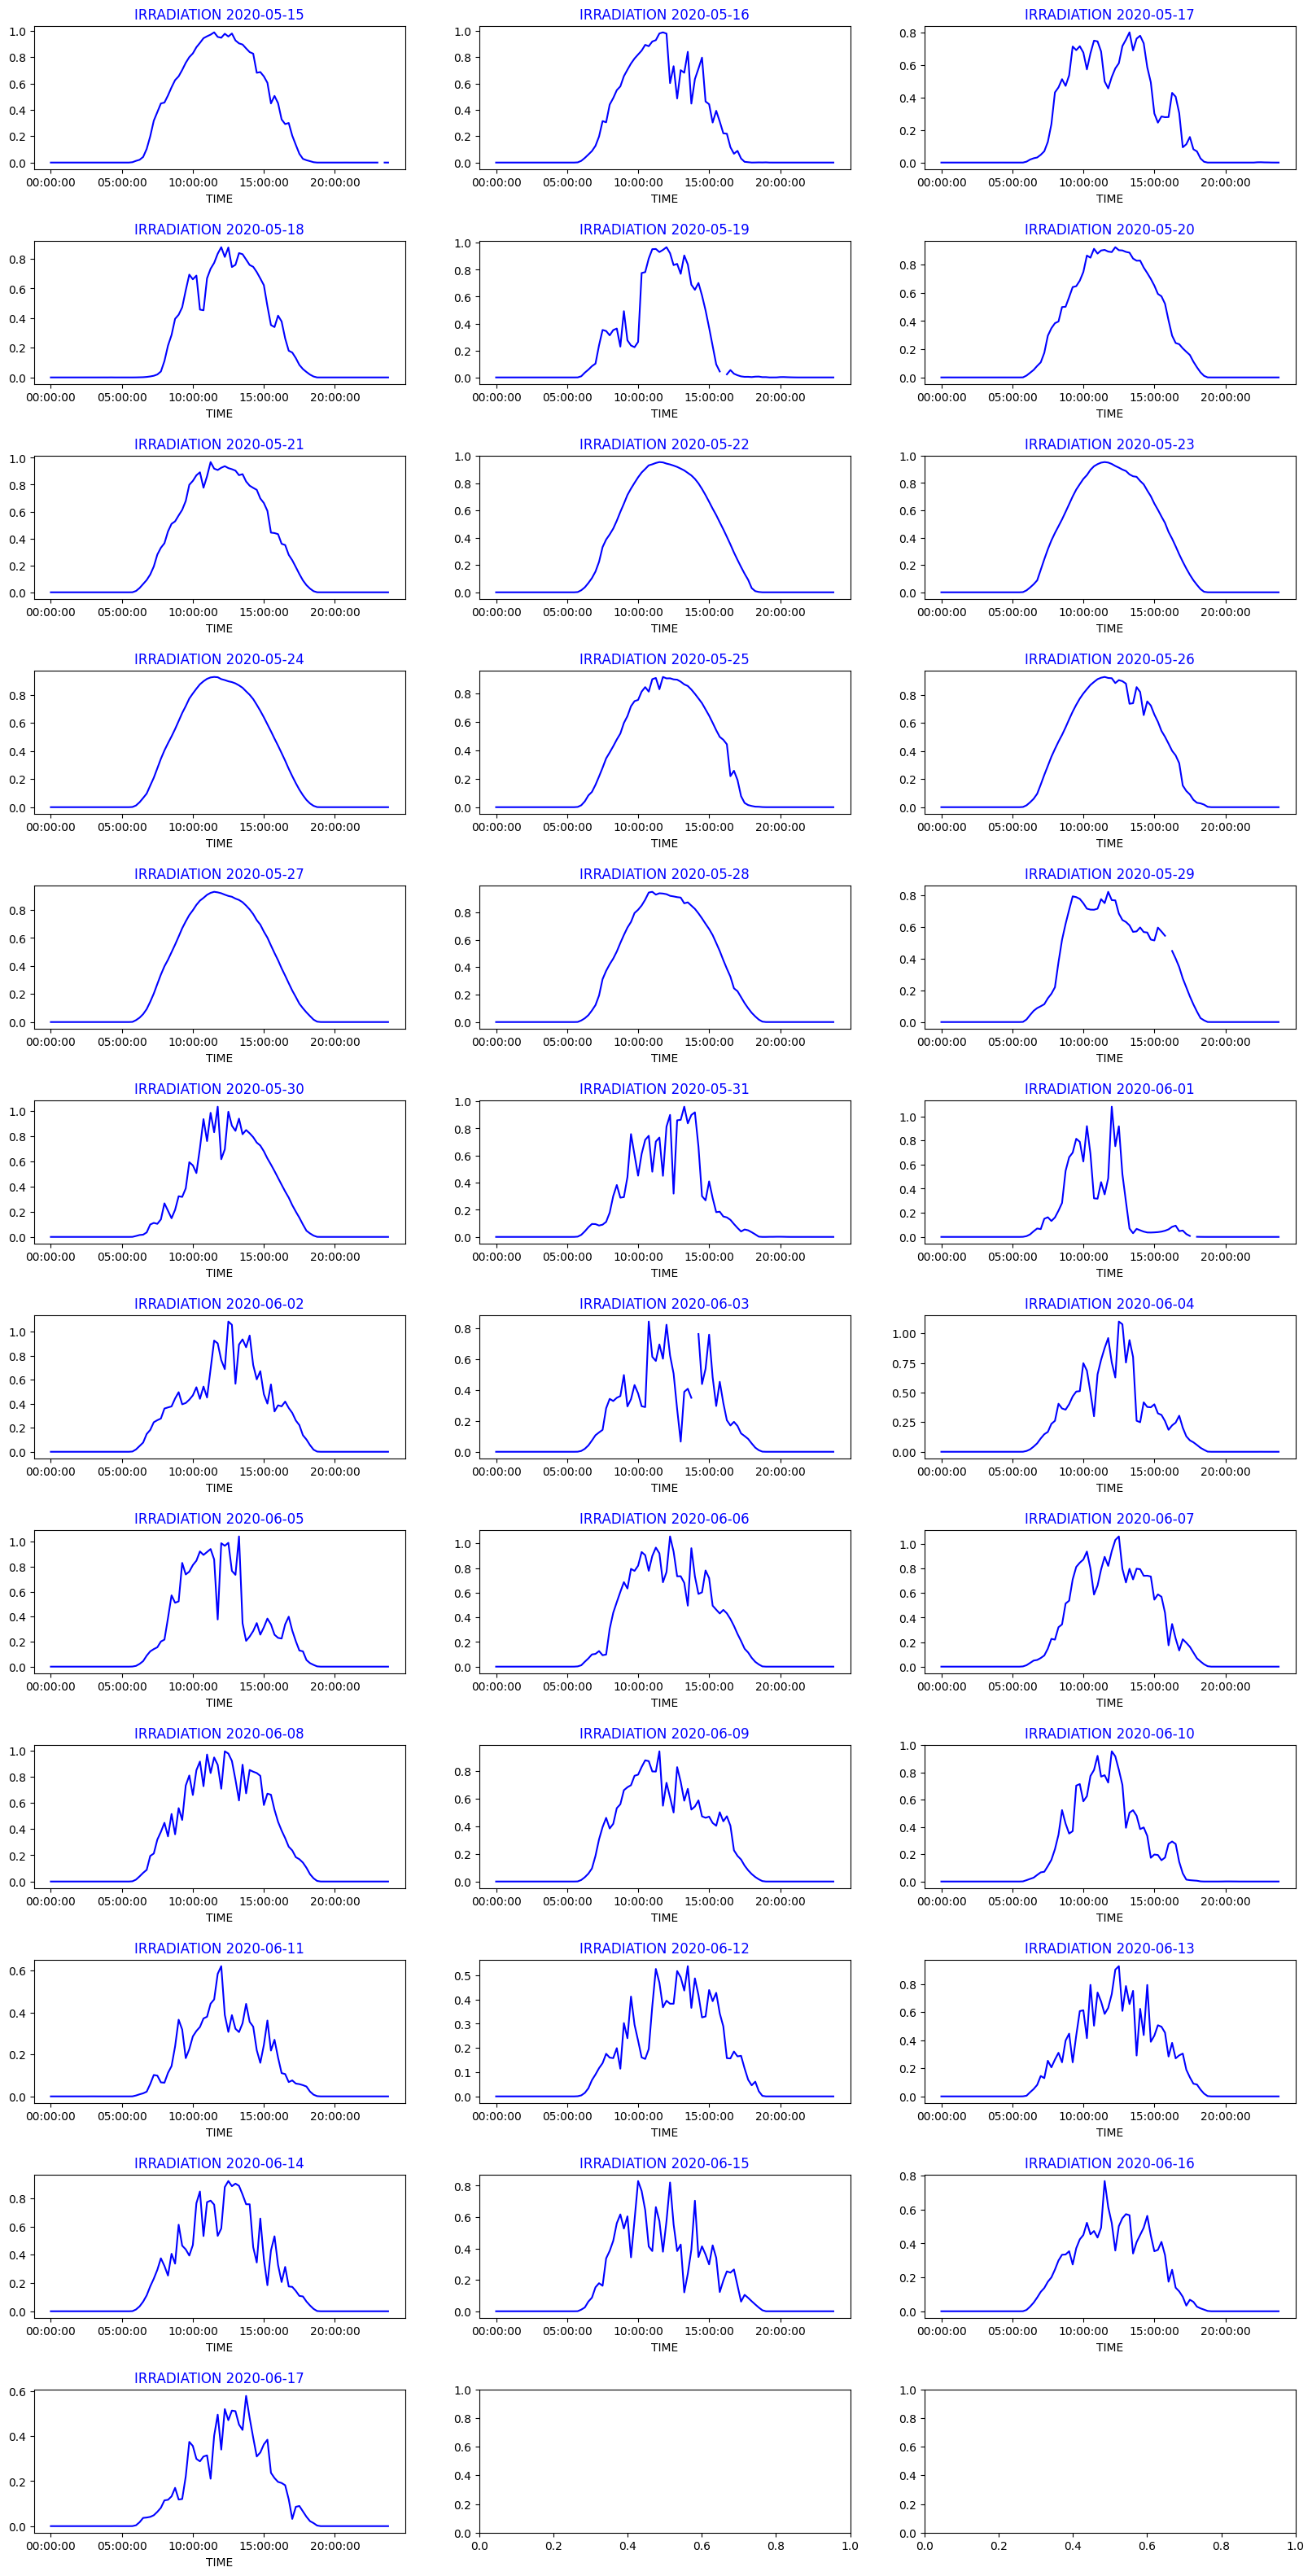

In [28]:
solar_irradiation = df_solar.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')
def daywise_plot(data=None, row=None, col=None, title='IRRADIATION'):
    cols = data.columns
    num_cols = len(cols)
    num_rows = (num_cols + col - 1) // col  # Calculate the number of rows needed
    fig, axes = plt.subplots(num_rows, col, figsize=(20, 40))

    fig.subplots_adjust(wspace=0.2, hspace=0.5)
    for i, col_name in enumerate(cols):
        row_index = i // col
        col_index = i % col
        ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]  # Adjusting subplot indexing for multiple rows
        data[col_name].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, col_name), color='blue')

daywise_plot(data=solar_irradiation, row=12, col=3)


IRRADIATION graph pattern is looking very similar to the corresponding DC_POWER generation on per day basis.

In solar power plant DC_POWER or Output power is mostly depends on IRRADIATION .Or it is not wrong to say that it’s directly proportional.

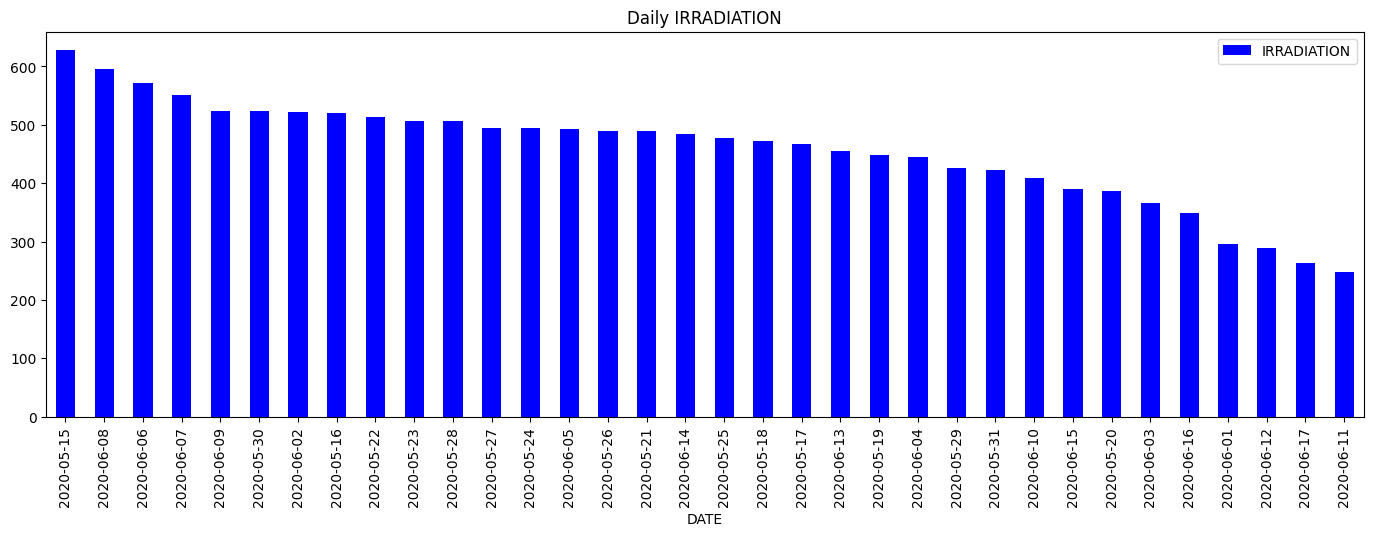

In [29]:
# Grouping by date and aggregating the sum of IRRADIATION for each date
daily_irradiation = df_solar.groupby('DATE')['IRRADIATION'].agg('sum')

# Sorting the daily_irradiation Series in descending order of IRRADIATION
daily_irradiation_sorted = daily_irradiation.sort_values(ascending=False)

# Plotting the sorted daily irradiation
daily_irradiation_sorted.plot.bar(figsize=(17,5), legend=True, color='blue')
plt.title('Daily IRRADIATION')
plt.show()


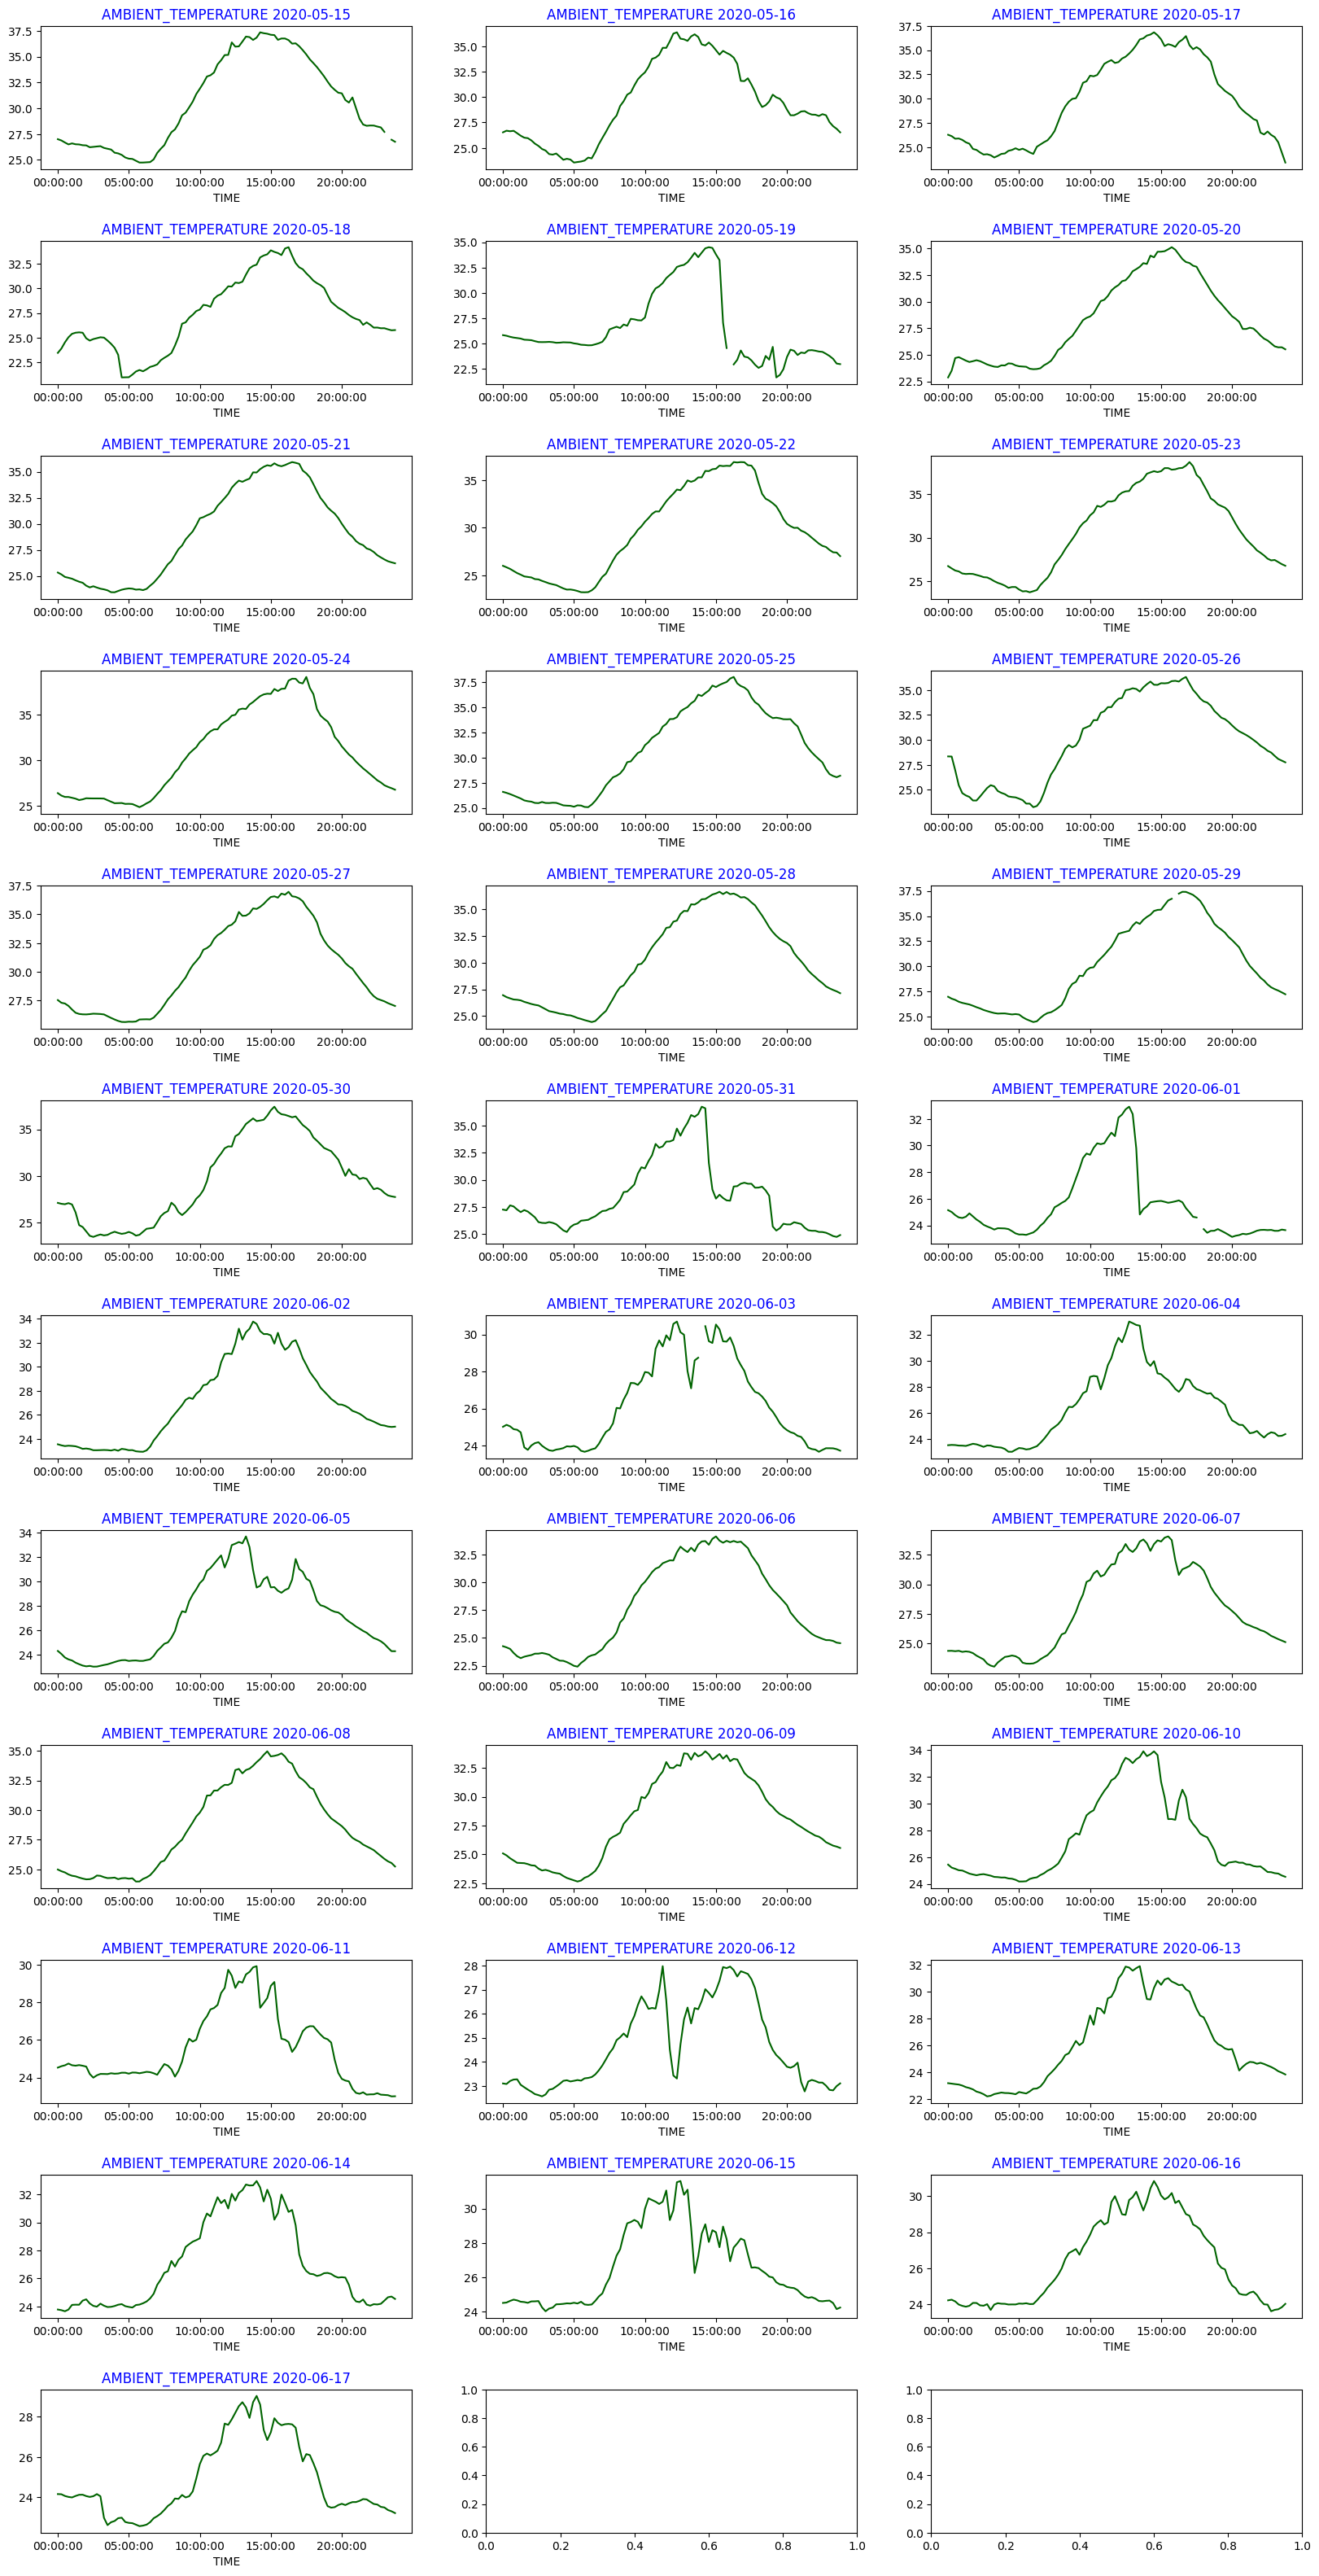

In [30]:
solar_ambiant_temp = df_solar.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')
def daywise_plot(data=None, row=None, col=None, title='AMBIENT_TEMPERATURE'):
    cols = data.columns
    num_cols = len(cols)
    num_rows = (num_cols + col - 1) // col  # Calculate the number of rows needed
    fig, axes = plt.subplots(num_rows, col, figsize=(20, 40))

    fig.subplots_adjust(wspace=0.2, hspace=0.5)
    for i, col_name in enumerate(cols):
        row_index = i // col
        col_index = i % col
        ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]  # Adjusting subplot indexing for multiple rows
        data[col_name].plot(ax=ax, color='darkgreen')
        ax.set_title('{} {}'.format(title, col_name), color='blue')

daywise_plot(data=solar_ambiant_temp, row=12, col=3)


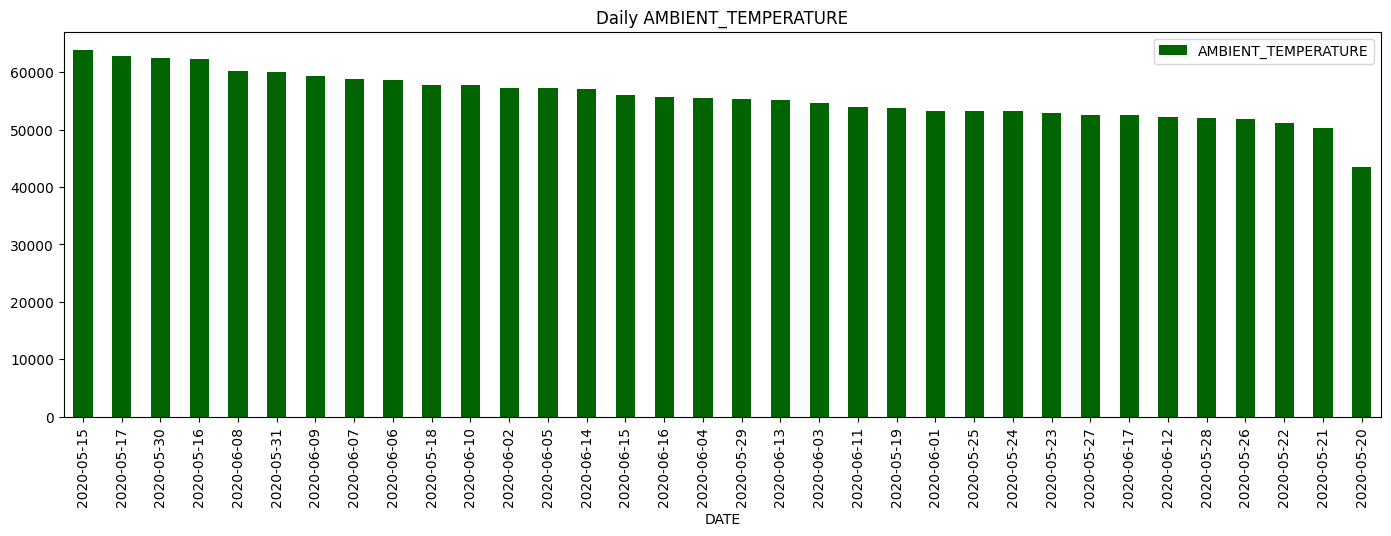

In [31]:
# Grouping by date and aggregating the sum of AMBIENT_TEMPERATURE for each date
daily_ambient_temp = df_solar.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')

# Sorting the daily_ambient_temp Series in descending order of AMBIENT_TEMPERATURE
daily_ambient_temp_sorted = daily_ambient_temp.sort_values(ascending=False)

# Plotting the sorted daily ambient temperature
daily_ambient_temp_sorted.plot.bar(figsize=(17,5), legend=True, color='darkgreen')
plt.title('Daily AMBIENT_TEMPERATURE')
plt.show()


##Best and Worst Power generation comparision:

Major Environmental Factors affecting the of solar power generation are.

1. The thickness of clouds is also a factor in how much sunlight your solar panels can soak up. We may see thicker clouds in winter too and this is something else to look out for. It’s hard for sunlight to travel through thick clouds, which will affect your solar power system’s output.
2. While we’ve looked at the sun’s positioning and how it can affect output, there’s another factor to consider when your system may not be performing at its maximum… even at midday.
3. Solar panel temperature is the number one reason behind your solar power system not achieving peak performance
4. Solar power generation is directly depends on Irradiation comming from the sun.

9. Highest average DC_POWER is generated on "2020-05-15"

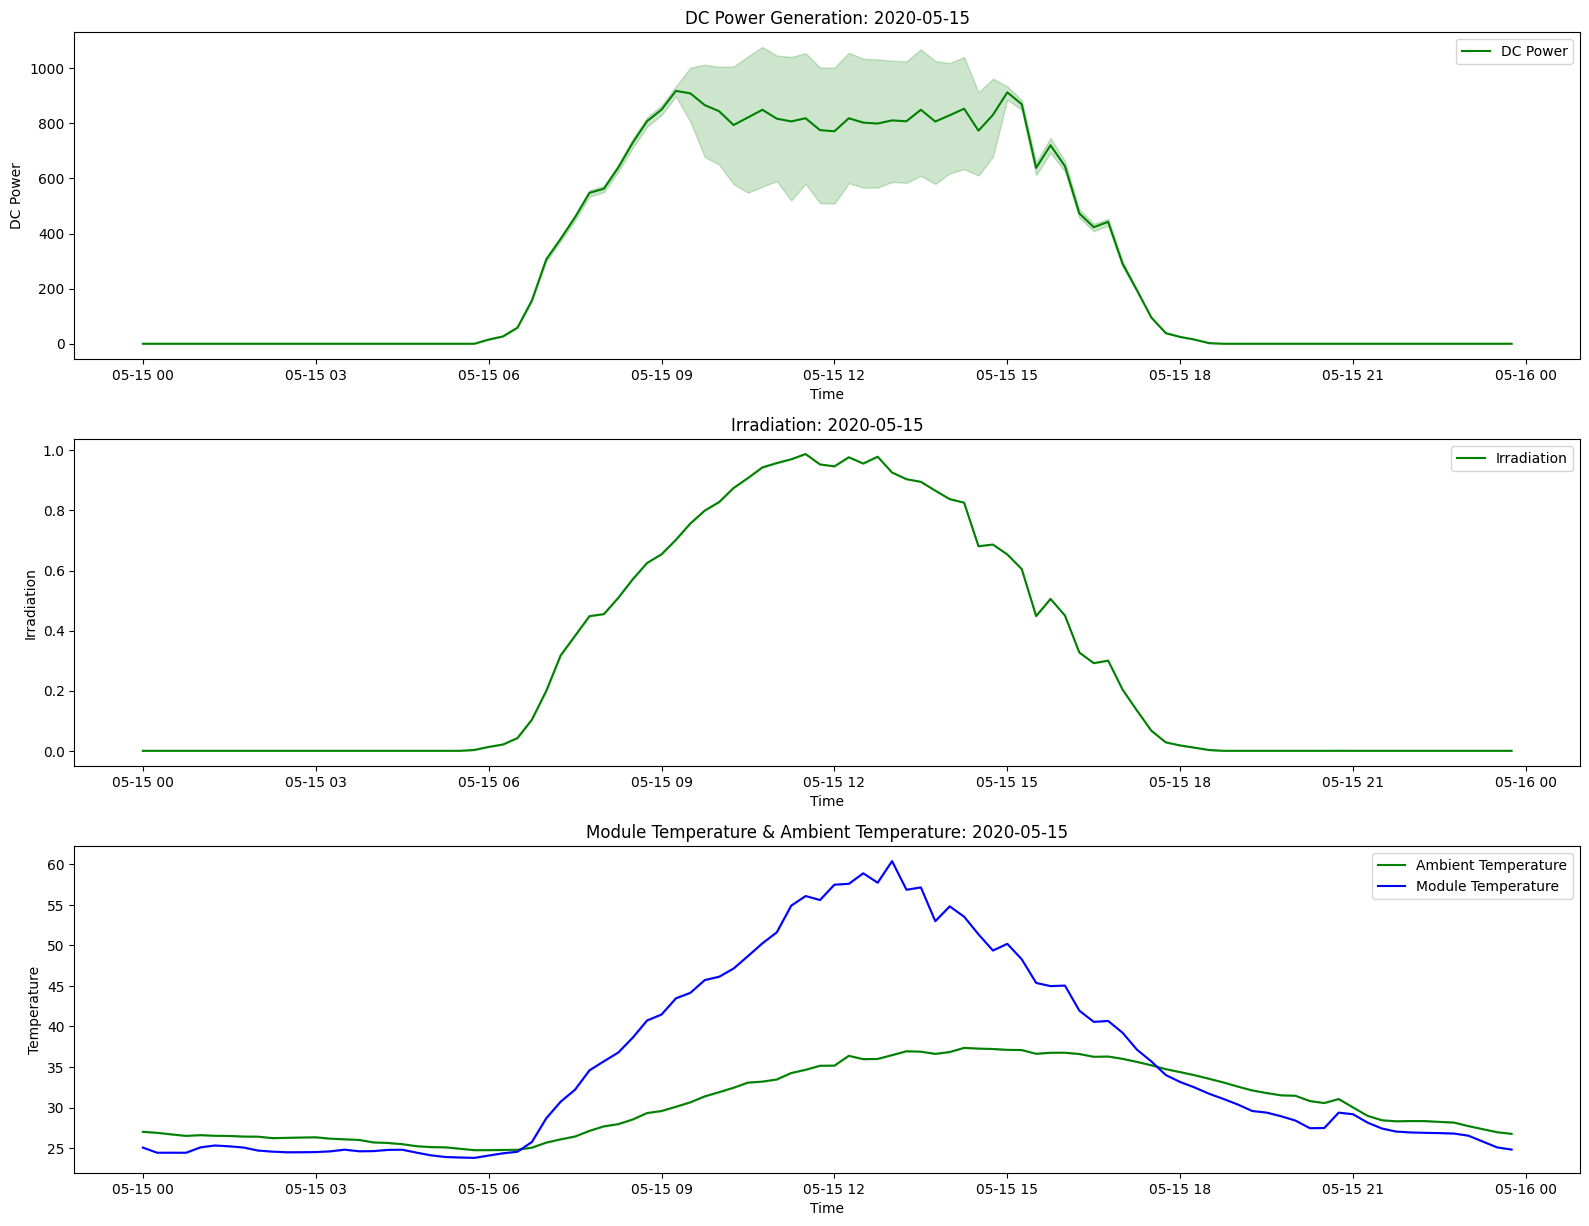

In [32]:
# Define the date of interest
date = "2020-05-15"

# Filter data for the specified date
date_data = df_solar[df_solar["DATE_STRING"] == date]

# Set the figure size
plt.figure(figsize=(16, 16))

# Plot DC Power Generation
plt.subplot(411)
sns.lineplot(x=date_data["DATE_TIME"], y=date_data["DC_POWER"], label="DC Power", color='green')
plt.title("DC Power Generation: {}".format(date))
plt.xlabel('Time')
plt.ylabel('DC Power')

# Plot Irradiation
plt.subplot(412)
sns.lineplot(x=date_data["DATE_TIME"], y=date_data["IRRADIATION"], label="Irradiation", color='green')
plt.title("Irradiation: {}".format(date))
plt.xlabel('Time')
plt.ylabel('Irradiation')

# Plot Module and Ambient Temperatures
plt.subplot(413)
sns.lineplot(x=date_data["DATE_TIME"], y=date_data["AMBIENT_TEMPERATURE"], label="Ambient Temperature", color='green')
sns.lineplot(x=date_data["DATE_TIME"], y=date_data["MODULE_TEMPERATURE"], label="Module Temperature", color='blue')
plt.title("Module Temperature & Ambient Temperature: {}".format(date))
plt.xlabel('Time')
plt.ylabel('Temperature')

# Improve layout
plt.tight_layout()
plt.show()


NOTE: Both DC_POWER graph and IRRADIATION graph is almost looking like an ideal graph which is explained earlier. Weather is also looking good, and there is no cloud is in the sky because there is very less variation in IRRADIATION and temperature of the solar panel and ambient temperature.

11. Lowest average DC_POWER is generated on "2020-06-11"

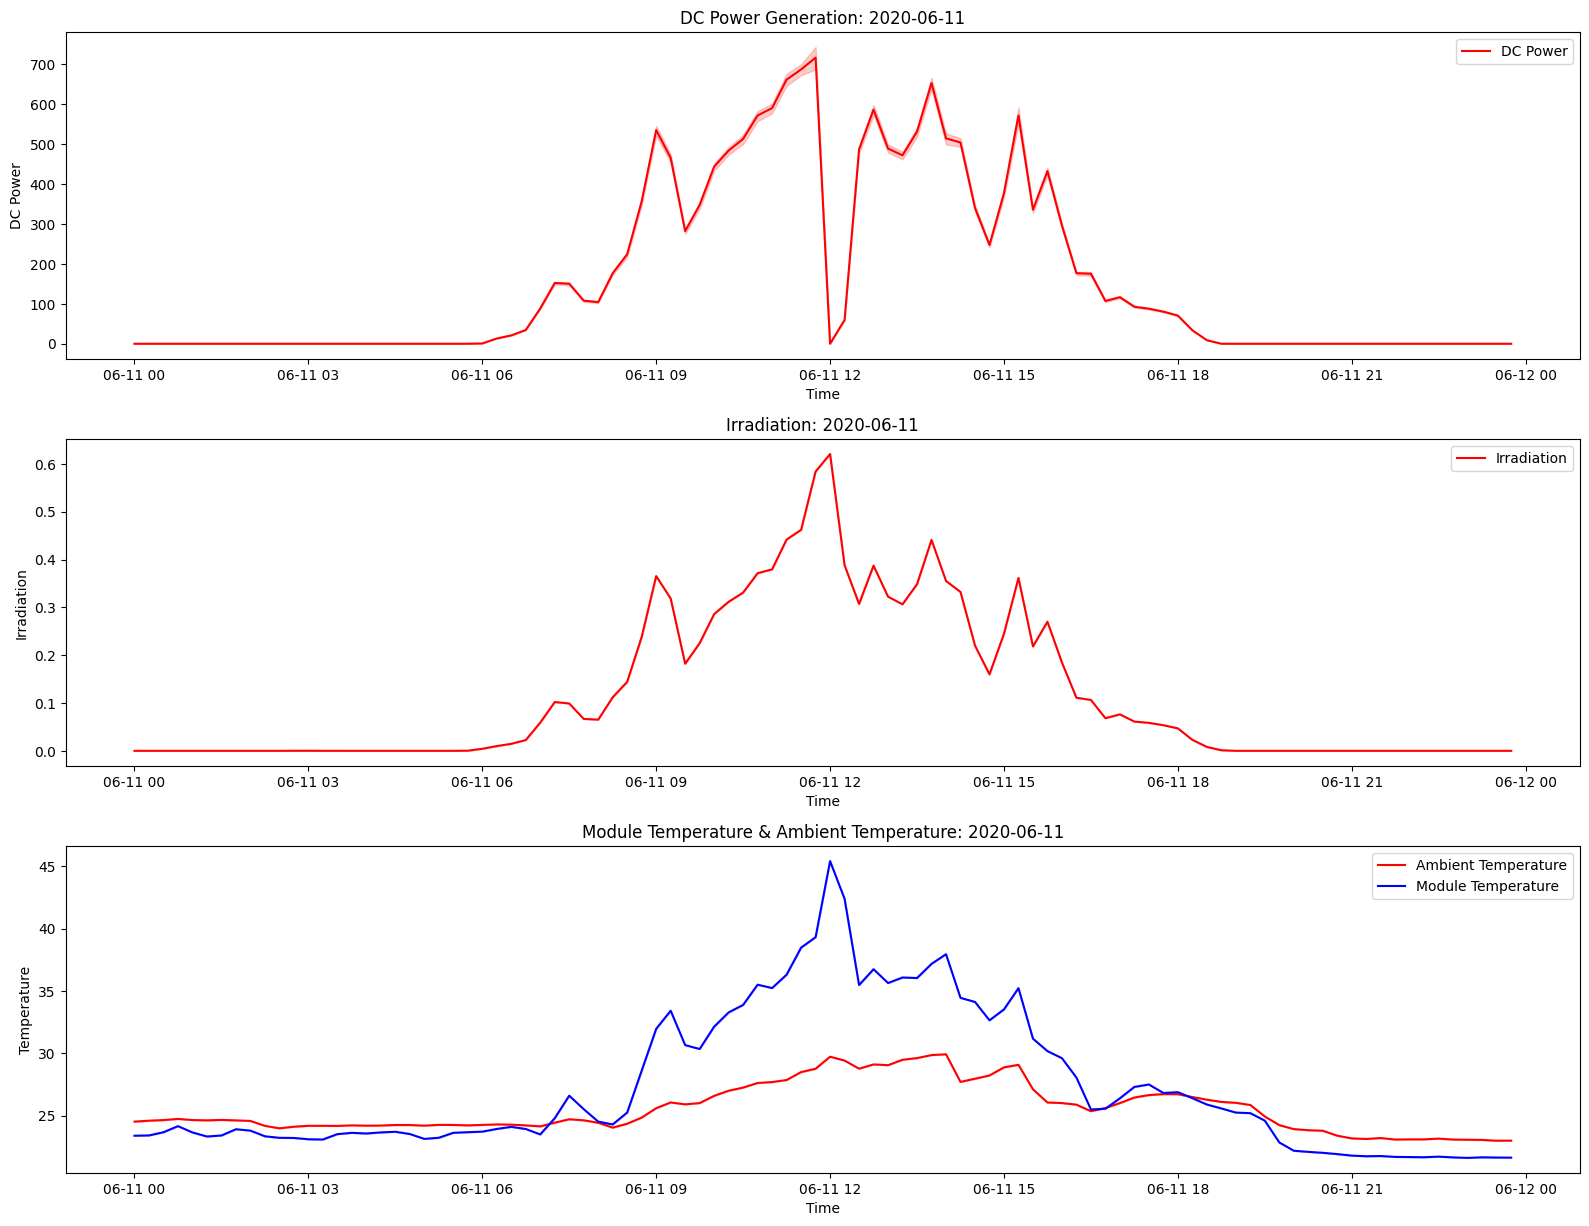

In [33]:
# Define the date of interest
date = "2020-06-11"

# Filter data for the specified date
date_data = df_solar[df_solar["DATE_STRING"] == date]

# Set the figure size
plt.figure(figsize=(16, 16))

# Plot DC Power Generation
plt.subplot(411)
sns.lineplot(x='DATE_TIME', y='DC_POWER', data=date_data, label="DC Power", color='red')
plt.title("DC Power Generation: {}".format(date))
plt.xlabel('Time')
plt.ylabel('DC Power')

# Plot Irradiation
plt.subplot(412)
sns.lineplot(x='DATE_TIME', y='IRRADIATION', data=date_data, label="Irradiation", color='red')
plt.title("Irradiation: {}".format(date))
plt.xlabel('Time')
plt.ylabel('Irradiation')

# Plot Ambient and Module Temperatures
plt.subplot(413)
sns.lineplot(x='DATE_TIME', y='AMBIENT_TEMPERATURE', data=date_data, label="Ambient Temperature", color='red')
sns.lineplot(x='DATE_TIME', y='MODULE_TEMPERATURE', data=date_data, label="Module Temperature", color='blue')
plt.title("Module Temperature & Ambient Temperature: {}".format(date))
plt.xlabel('Time')
plt.ylabel('Temperature')

# Improve layout
plt.tight_layout()
plt.show()


NOTE: There are very large fluctuations in both DC_POWER graph and IRRADIATION graph

Possible Reasons for these large fluctuation in the DC_POWER, IRRADIATION, Ambient temperature, Module temperature:

1. At about 12 O’clock there is a sharp decline in the DC_POWER generation from 700 to almost 20 KWatt.

2. And at the same time IRRADIATION fall from 0.6 to 0.3 almost half.

3. Ambient temperature and Module temperature also fall drastically. Module temperature from 45 C to 35 C & Ambient temperature is also reduced.

The possible reason for this reduction is due to may be heavy rain and heavily clouded sky and bad weather. There is almost very less possibility of any fault in the system

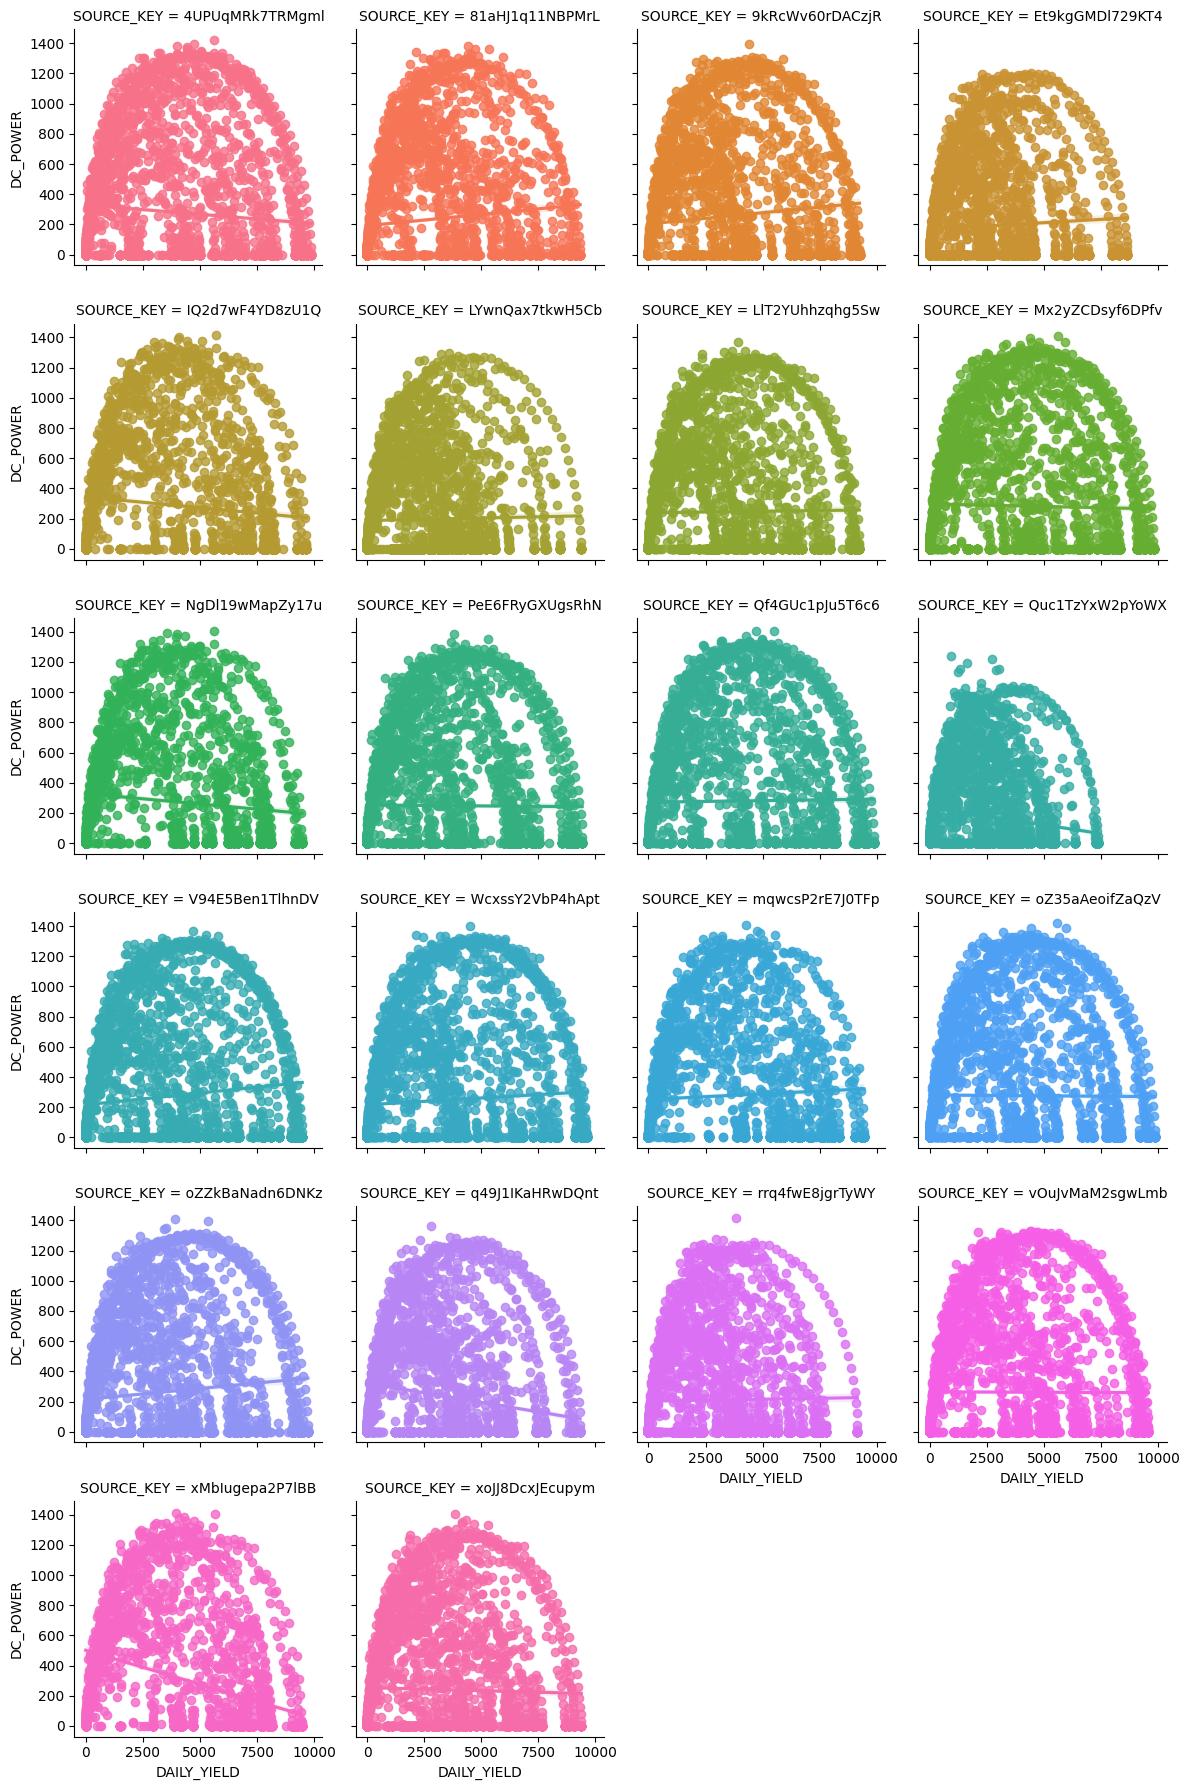

In [35]:
sns.lmplot(y="DC_POWER", x="DAILY_YIELD", hue="SOURCE_KEY", col="SOURCE_KEY", height=3, col_wrap=4, data=df_solar, fit_reg=True);

##Solar Power Plant Inverter Efficiency Calculation

In [36]:
solar_dc_power = df_solar[df_solar['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power = df_solar[df_solar['AC_POWER'] > 0]['AC_POWER'].values

In [37]:
solar_plant_eff = (np.max(solar_ac_power)/np.max(solar_dc_power ))*100
print(f"Power ratio AC/DC (Efficiency) of Solar Power Plant:  {solar_plant_eff:0.3f} %")

Power ratio AC/DC (Efficiency) of Solar Power Plant:  97.501 %


In [38]:
AC_list=[]
for i in df_solar['AC_POWER']:
    if i>0:
        AC_list.append(i)
AC_list
#AC_list.sort()
#AC_list.reverse()
len(AC_list)

32036

In [39]:
#Here we take all nonzero DC values and plot them on histogram
DC_list=[]
for i in df_solar['DC_POWER']:
    if i>0:
        DC_list.append(i)
DC_list
DC_list.sort()
DC_list.reverse()
len(DC_list)

32036

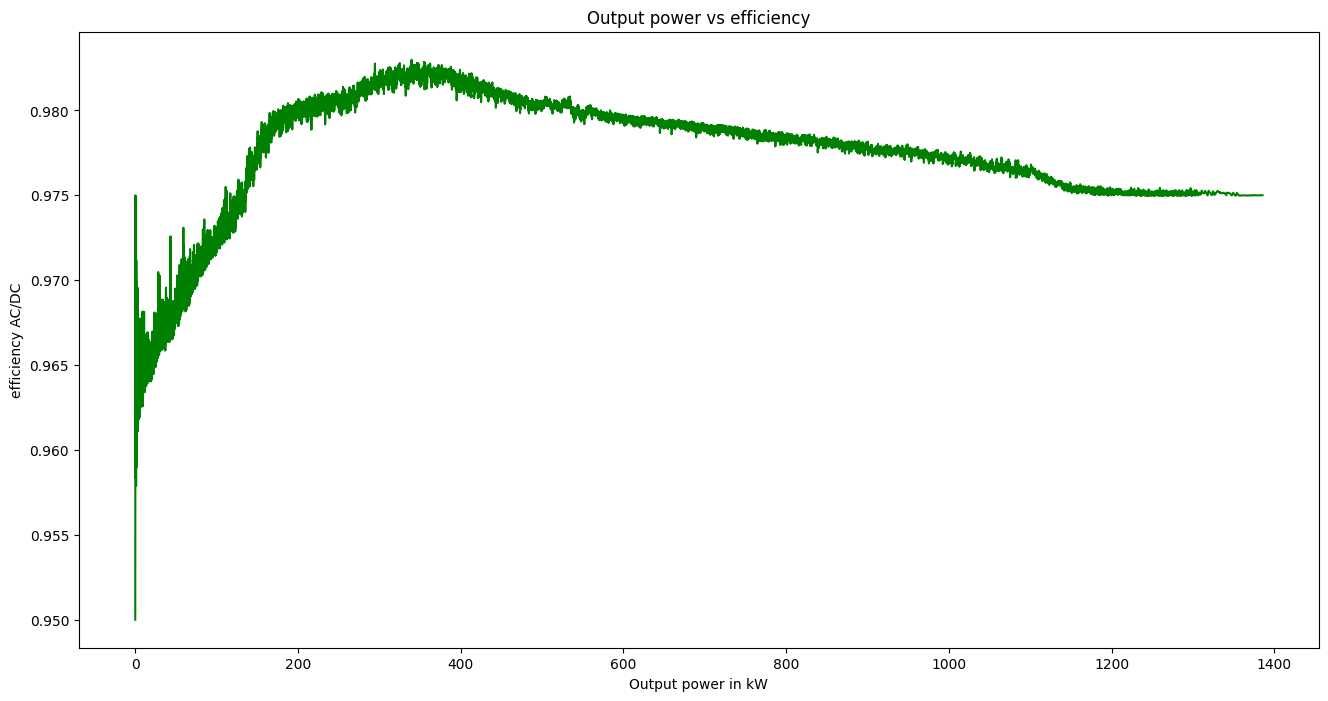

In [41]:
plt.figure(figsize=(16,8))
AC_list.sort()
DC_list.sort()
#print(DC_list)
#DC_list.sort
#res = [i / 10 for i in AC_list]
eff = [i/j for i,j in zip(AC_list,DC_list)]

plt.plot(AC_list,eff,color='green')
plt.xlabel('Output power in kW')
plt.ylabel('efficiency AC/DC')
plt.title('Output power vs efficiency');


11. What does inverter efficiency mean?

In fact, we shall discuss here the general power inverter efficiency whether it’s solar inverter or pure sine wave inverter or even modified sine wave inverter.

The inverter efficiency refers to how much dc power will be converted to ac power, as some of power will be lost during this transition in two forms:

Heat loss.

Stand-by power which consumed just to keep the inverter in power mode. Also, we can refer to it as inverter power consumption at no load condition.

Hence, inverter efficiency = pac/pdc where pac refers to ac output power in watt and pdc refers to dc input power in watts.

For the two basic inverters types in the market, the typical efficiency of high-quality pure sine wave inverter varied from 90% to 95% and for low quality modified sine wave inverter, it varied from 75% to 85%.

This power inverter efficiency value depends on inverter load power capacity variation, as the efficiency increases and may reach to its max value at higher load power capacity in compare to lower loading power capacity, and in condition that not going above inverter output power capacity limit. Generally, below 15% inverter loading, the efficiency will be quite low. Consequently, good matching between inverter capacity and its load capacity will enable us harvest larger efficiency, which means larger inverter ac output power for the same dc input power.

##Solar Power Prediction

In [42]:
df2 = df_solar.copy()
X = df2[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
y = df2['AC_POWER']

In [43]:
X.head()

,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER
0,9425.000,2.429e+06,27.005,25.061,0.0,0.0
1,0.000,1.215e+09,27.005,25.061,0.0,0.0
2,3075.333,2.248e+09,27.005,25.061,0.0,0.0
3,269.933,1.704e+06,27.005,25.061,0.0,0.0
4,3177.000,1.994e+07,27.005,25.061,0.0,0.0


In [44]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: AC_POWER, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)

1. LinearRegression

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create a Linear Regression model
lr_clf = LinearRegression()

# Fit the model to the training data
lr_clf.fit(X_train, y_train)

# Calculate the R² score on the test data
score_lr = 100 * lr_clf.score(X_test, y_test)

# Print the R² score
print(f'LR Model score = {score_lr:4.4f}%')


LR Model score = 99.9994%


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create a Linear Regression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Predict the target variable using the test data
y_pred_lr = lr.predict(X_test)

# Calculate the R² score between predicted and actual target values
R2_Score_lr = round(r2_score(y_pred_lr, y_test) * 100, 2)

# Print the R² score
print("R2 Score:", R2_Score_lr, "%")


R2 Score: 100.0 %


2. RandomForestRegressor

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Instantiate the RandomForestRegressor
rfr_model = RandomForestRegressor()

# Train the RandomForestRegressor model
rfr_model.fit(X_train, y_train)

# Predict using the trained model
y_pred_rfr = rfr_model.predict(X_test)

# Calculate the R2 score
R2_Score_rfr = round(r2_score(y_pred_rfr, y_test) * 100, 2)

# Print the R2 Score
print("R2 Score:", R2_Score_rfr, "%")



R2 Score: 100.0 %


3. DecisionTreeRegressor

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Instantiate the DecisionTreeRegressor
dtr_model = DecisionTreeRegressor()

# Train the DecisionTreeRegressor model
dtr_model.fit(X_train, y_train)

# Predict using the trained model
y_pred_dtr = dtr_model.predict(X_test)

# Calculate the R2 score
R2_Score_dtr = round(r2_score(y_pred_dtr, y_test) * 100, 2)

# Print the R2 Score
print("R2 Score:", R2_Score_dtr, "%")


R2 Score: 100.0 %


12. Result Prediction

In [52]:
# Make predictions using the trained RandomForestRegressor model
predictions = rfr_model.predict(X_test)

# Print the predictions
print(predictions)


[   0.            0.          684.74041905 ...    0.         1007.12973333
    0.        ]


In [53]:
# Create a DataFrame for cross-checking actual and predicted values
cross_checking = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# Display the first few rows of the DataFrame
cross_checking.head()


,Actual,Predicted
40426,0.000,0.00
50974,0.000,0.00
53919,684.913,684.74
2384,0.000,0.00
22014,0.000,0.00


In [54]:
# Calculate the error between actual and predicted values
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']

# Display the DataFrame with the error column added
cross_checking.head()


,Actual,Predicted,Error
40426,0.000,0.00,0.000
50974,0.000,0.00,0.000
53919,684.913,684.74,0.173
2384,0.000,0.00,0.000
22014,0.000,0.00,0.000


In [56]:
# Filter the DataFrame to include only rows where the error is less than or equal to 20
cross_checking_final = cross_checking[cross_checking['Error'] <= 20]

# Sample 25 rows from the filtered DataFrame and apply styling
styled_cross_checking_final = cross_checking_final.sample(25).style.background_gradient(
    cmap='coolwarm').set_properties(**{
        'font-family': 'Lucida Calligraphy',
        'color': 'LigntGreen',  # Typo: 'LightGreen'
        'font-size': '15px'
    })

styled_cross_checking_final



,Actual,Predicted,Error
9487,0.000000,0.000000,0.000000
66043,0.000000,0.000000,0.000000
45486,955.350000,955.667262,-0.317262
19391,259.133333,259.189114,-0.055781
38896,475.626667,475.900390,-0.273724
19066,0.000000,0.000000,0.000000
42796,0.000000,0.000000,0.000000
52625,0.000000,0.000000,0.000000
42303,0.000000,0.000000,0.000000
9768,360.166667,360.822986,-0.656319
